# Exercise: 311 Requests

#### Summary

In NYC, you can call 311 with *anything* about the city - questions, complaints, etc. We'll be analyzing requests from 2015-2016 from the Department of Transportation and NYPD.

#### Data Source(s)

Filtered from full set, https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

#### Files

- `311-requests/311_Service_Requests_from_2010_to_Present.csv`, about 1.8 million rows (over 1GB of data)

#### Data dictionary

Visit [this page](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9#schema-preview) and click 'Show more' on the bottom right of the list (53 columns).

#### Skills

- Opening large files
- Time

## Opening the file

It's a big one! If your computer is slow or you only have 2GB of RAM, you might want to specify `nrows=50000` (or less). Increase the number until it takes around 20 seconds, maybe!

In [1]:
import pandas as pd
% matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv",nrows=50000)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (17,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10460.0,1110 WYATT STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.839306,-73.877301,"(40.83930620730105, -73.8773009180668)"
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830222,-73.947684,"(40.830222460372724, -73.94768359377827)"


In [5]:
df.shape

(50000, 53)

### Measuring time in Jupyter Notebooks

How long did that take? Read it in again, but this time **time how long it takes.** (and no, not with your watch - with Jupyter!)

In [6]:
%%time
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv",nrows=50000)

CPU times: user 736 ms, sys: 86.8 ms, total: 822 ms
Wall time: 835 ms


<string>:2: DtypeWarning: Columns (17,47) have mixed types. Specify dtype option on import or set low_memory=False.


### Look at the first few rows

Make sure you can see **every single column.**

In [7]:
pd.set_option('display.max_columns',100)

In [8]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10460.0,1110 WYATT STREET,WYATT STREET,DEVOE AVENUE,BRONX PARK AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,09/05/2015 06:55:25 AM,The Police Department responded and upon arriv...,09/05/2015 02:06:54 AM,06 BRONX,BRONX,1018201.0,245083.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.839306,-73.877301,"(40.83930620730105, -73.8773009180668)"
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,NaN,NaN,NaN,WEST 151 STREET,BROADWAY,INTERSECTION,NEW YORK,NaN,Precinct,Closed,09/04/2015 09:53:45 PM,The Police Department responded to the complai...,09/04/2015 06:37:24 PM,09 MANHATTAN,MANHATTAN,998728.0,241754.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830222,-73.947684,"(40.830222460372724, -73.94768359377827)"
2,31463992,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,545 WEST 144 STREET,WEST 144 STREET,AMSTERDAM AVENUE,BROADWAY,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,09/05/2015 05:15:43 AM,The Police Department responded to the complai...,09/04/2015 10:32:02 PM,09 MANHATTAN,MANHATTAN,998263.0,239889.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825104,-73.949368,"(40.825104318551325, -73.94936777115372)"
3,31463993,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11203.0,UTICA AVENUE,UTICA AVENUE,AVENUE D,FOSTER AVENUE,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/05/2015 09:06:57 AM,The Police Department responded to the complai...,09/05/2015 02:26:44 AM,17 BROOKLYN,BROOKLYN,1003890.0,172805.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640965,-73.929232,"(40.64096464471428, -73.92923194083798)"
4,31463995,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,Street/Sidewalk,11210.0,GLENWOOD ROAD,GLENWOOD ROAD,BROOKLYN AVENUE,EAST 37 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Closed,09/04/2015 03:48:25 PM,The Police Department responded to the complai...,09/04/2015 05:21:19 PM,17 BROOKLYN,BROOKLYN,1000480.0,170405.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634384,-73.941525,"(40.63438406330588, -73.9415248319131)"


### Speeding things up

We're going to be looking at open and close times, agencies, and the complaints (both types and descriptor). The only kind of location-based thing we'll want is borough.

**How much faster is it if we only read in those columns?**

In [9]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [10]:
%%time
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv", nrows=50000,
                 usecols= ['Borough', 'Agency', 'Closed Date', 'Created Date','Complaint Type', 'Descriptor'])

CPU times: user 276 ms, sys: 37.3 ms, total: 314 ms
Wall time: 321 ms


## Converting the 'Created Date' and 'Closed Date' columns to datetimes

### First, testing some things out

Let's take a look at converting **Created Date**, but **not all at once**.

1. Take 10,000 of them and try to convert them **without** a format string. Time it.
2. Take the same 10,000 and try to convert them **with** a format string. Time it.

If you tried to do all 1.8 million rows, **how long might it take with a format string vs without?**

In [11]:
%%time
pd.to_datetime(df['Created Date']).head(10000)

CPU times: user 10.4 s, sys: 24.3 ms, total: 10.5 s
Wall time: 10.5 s


0      2015-09-04 22:55:25
1      2015-09-04 13:53:45
2      2015-09-04 21:15:43
3      2015-09-05 01:06:57
4      2015-09-04 07:48:25
5      2015-09-04 11:31:12
6      2015-09-04 07:02:24
7      2015-09-04 12:34:05
8      2015-09-04 19:56:42
9      2015-09-04 21:04:42
10     2015-09-04 20:26:09
11     2015-09-04 11:07:15
12     2015-09-04 22:23:59
13     2015-09-04 23:16:12
14     2015-09-04 16:49:55
15     2015-09-04 14:39:46
16     2015-09-04 20:21:22
17     2015-09-04 23:34:23
18     2015-09-04 21:55:19
19     2015-09-04 23:44:07
20     2015-09-04 08:12:10
21     2015-09-04 23:14:40
22     2015-09-04 20:17:20
23     2015-09-04 22:54:59
24     2015-09-04 15:45:14
25     2015-09-04 23:48:20
26     2015-09-05 01:53:40
27     2015-09-04 23:34:47
28     2015-09-04 23:37:52
29     2015-09-04 23:01:37
               ...        
9970   2015-09-07 13:39:12
9971   2015-09-07 06:53:28
9972   2015-09-07 06:10:00
9973   2015-09-07 04:02:27
9974   2015-09-07 09:00:33
9975   2015-09-07 07:13:20
9

In [12]:
%%time
pd.to_datetime(df['Created Date'].head(10000),format="%m/%d/%Y %X %p")

CPU times: user 48.7 ms, sys: 300 µs, total: 49 ms
Wall time: 48.8 ms


0      2015-09-04 10:55:25
1      2015-09-04 01:53:45
2      2015-09-04 09:15:43
3      2015-09-05 01:06:57
4      2015-09-04 07:48:25
5      2015-09-04 11:31:12
6      2015-09-04 07:02:24
7      2015-09-04 12:34:05
8      2015-09-04 07:56:42
9      2015-09-04 09:04:42
10     2015-09-04 08:26:09
11     2015-09-04 11:07:15
12     2015-09-04 10:23:59
13     2015-09-04 11:16:12
14     2015-09-04 04:49:55
15     2015-09-04 02:39:46
16     2015-09-04 08:21:22
17     2015-09-04 11:34:23
18     2015-09-04 09:55:19
19     2015-09-04 11:44:07
20     2015-09-04 08:12:10
21     2015-09-04 11:14:40
22     2015-09-04 08:17:20
23     2015-09-04 10:54:59
24     2015-09-04 03:45:14
25     2015-09-04 11:48:20
26     2015-09-05 01:53:40
27     2015-09-04 11:34:47
28     2015-09-04 11:37:52
29     2015-09-04 11:01:37
               ...        
9970   2015-09-07 01:39:12
9971   2015-09-07 06:53:28
9972   2015-09-07 06:10:00
9973   2015-09-07 04:02:27
9974   2015-09-07 09:00:33
9975   2015-09-07 07:13:20
9

In [13]:
%%time
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv")
pd.to_datetime(df['Created Date'])

<string>:2: DtypeWarning: Columns (17,47) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 6min 55s, sys: 4.94 s, total: 7min
Wall time: 7min 4s


In [14]:
%%time
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv")
pd.to_datetime(df['Created Date'],format="%m/%d/%Y %X %p")

<string>:2: DtypeWarning: Columns (17,47) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 29.5 s, sys: 4.37 s, total: 33.9 s
Wall time: 34.2 s


### Creating new columns

Create new columns called `created_at` and `closed_at` from the `Created Date` and `Closed Date` columns. Do them individually, and **time them**.

In [15]:
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv",
                 usecols= ['Borough', 'Agency', 'Closed Date', 'Created Date','Complaint Type', 'Descriptor'])

In [16]:
%%time
df['created_at']= pd.to_datetime(df['Created Date'], format="%m/%d/%Y %X %p")

CPU times: user 7.54 s, sys: 35.2 ms, total: 7.57 s
Wall time: 7.55 s


In [17]:
%%time
df['closed_at'] = pd.to_datetime(df['Closed Date'], format="%m/%d/%Y %X %p")

CPU times: user 7.56 s, sys: 33.4 ms, total: 7.59 s
Wall time: 7.57 s


### Confirming they look okay

Take a look at the first few rows to make sure the dates look correct, and then make sure their data type is `datetime64[ns]`.

In [18]:
df.head()

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,created_at,closed_at
0,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-04 10:55:25,2015-09-05 02:06:54
1,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 01:53:45,2015-09-04 06:37:24
2,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 09:15:43,2015-09-04 10:32:01
3,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 01:06:57,2015-09-05 02:26:43
4,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 07:48:25,2015-09-04 05:21:18


In [19]:
df.dtypes

Created Date              object
Closed Date               object
Agency                    object
Complaint Type            object
Descriptor                object
Borough                   object
created_at        datetime64[ns]
closed_at         datetime64[ns]
dtype: object

# Examining agencies

Who has more 311 requests, the Department of Transportation or the NYPD?

In [20]:
df['Agency'].value_counts()

NYPD    1251121
DOT      593157
Name: Agency, dtype: int64

## What's the difference between "Complaint Type" and "Descriptor" columns?

In [21]:
#From dictionary:
#Complaint Type = Full Agency name of responding City Government Agency
#Descriptor = This is associated to the Complaint Type, and provides further detail on the incident or condition. 
#Descriptor values are dependent on the Complaint Type, and are not always required in SR.

## What are the most popular categories of complaints for the NYPD? For the DOT?

In [22]:
df['Complaint Type'] [df['Agency'] =='NYPD'].value_counts().head()

Noise - Residential        429932
Blocked Driveway           219927
Illegal Parking            215158
Noise - Street/Sidewalk    112890
Noise - Commercial          93115
Name: Complaint Type, dtype: int64

In [23]:
df['Complaint Type'] [df['Agency'] =='DOT'].value_counts().head()

Street Condition            215052
Street Light Condition      187228
Traffic Signal Condition     79737
Broken Muni Meter            47234
Street Sign - Damaged        12041
Name: Complaint Type, dtype: int64

## When people are complaining about street conditions, what are they usually complaining about?

In [24]:
df['Descriptor'][df['Complaint Type'] == 'Street Condition'].value_counts().head()

Pothole                           137931
Cave-in                            22026
Rough, Pitted or Cracked Roads     12150
Defective Hardware                 11206
Failed Street Repair                9408
Name: Descriptor, dtype: int64

## What kinds of noise are they complaining about when making residential noise complaints?

In [25]:
df['Descriptor'][df['Complaint Type'] == 'Noise - Residential'].value_counts().head()

Loud Music/Party    283631
Banging/Pounding    108470
Loud Talking         30097
Loud Television       7734
Name: Descriptor, dtype: int64

# Timing our complaints

How many complaints were filed each month?

- Tip: You'll probably want to `.set_index` first!

In [26]:
df.set_index('created_at', inplace=True)

In [27]:
df.shape

(1844278, 7)

In [28]:
df.resample('M').count()

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,closed_at
created_at,,,,,,,
2015-01-31,58168,57932,58168,58168,57968,58168,57932
2015-02-28,59895,59663,59895,59895,59763,59895,59663
2015-03-31,87190,86753,87190,87190,86902,87190,86753
2015-04-30,78002,77626,78002,78002,77614,78002,77626
2015-05-31,87582,86677,87582,87582,86909,87582,86677
2015-06-30,84486,83924,84486,84486,83812,84486,83924
2015-07-31,77795,76561,77795,77795,76889,77795,76561
2015-08-31,78793,78286,78793,78793,77917,78793,78286
2015-09-30,78317,77764,78317,78317,77475,78317,77764


## Plot how many requests were filed each month

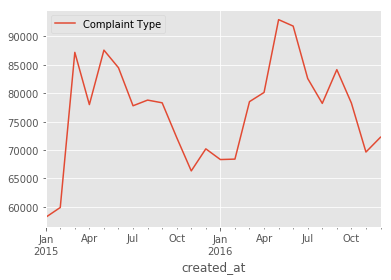

In [29]:
df.resample('M').count().plot(y='Complaint Type')

# Hmmm, it looks like a cycle

What could cause that? Try a couple comparisons to see if you can find out.

- Tip: Maybe the most popular summer complaints vs winter
- Tip: Maybe graphing the different agencies on the same graph

If you don't figure it out **that's okay!** 

In [30]:
#skipped

In [31]:
#skipped

## Time of day

### What time of day do people complain?

In [32]:
df.groupby(df.index.hour).count().sort_values(by='Created Date', ascending = False)

,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,closed_at
created_at,,,,,,,
11,232162,230883,232162,232162,230943,232162,230883
10,218008,216882,218008,218008,216579,218008,216882
12,192942,191730,192942,192942,191884,192942,191730
9,187637,186512,187637,187637,186167,187637,186512
8,159947,158980,159947,159947,158480,159947,158980
1,155368,153909,155368,155368,154477,155368,153909
2,143361,142049,143361,143361,142492,143361,142049
7,132544,131338,132544,132544,131309,132544,131338
3,118681,117687,118681,118681,117787,118681,117687


### What time of day do people complain about potholes?

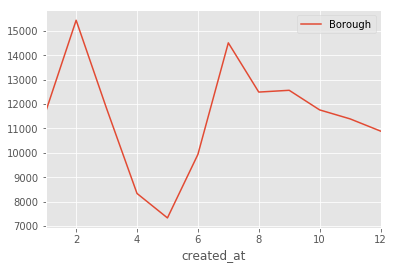

In [33]:
df[df['Descriptor'] == 'Pothole'].groupby(by=df[df['Descriptor'] == 'Pothole'].index.hour).count().plot(y="Borough")

### What time of day do people complain about loud parties?

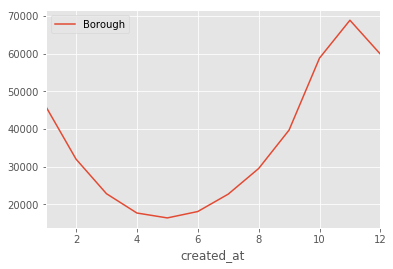

In [34]:
df[df['Descriptor'] == 'Loud Music/Party'].groupby(by=df[df['Descriptor'] == 'Loud Music/Party'].index.hour).count().plot(y="Borough")

## Days of the week

### What days of the week do people complain about potholes?

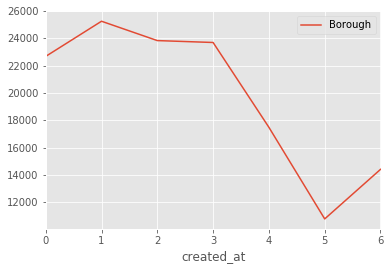

In [35]:
df[df['Descriptor'] == 'Pothole'].groupby(by=df[df['Descriptor'] == 'Pothole'].index.dayofweek).count().plot(y="Borough")

### What days of the week do people complain about loud parties?

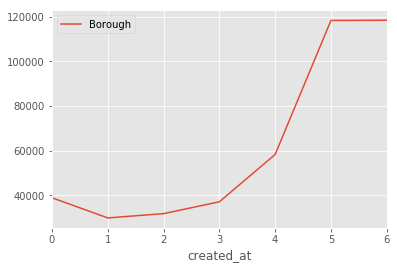

In [36]:
df[df['Descriptor'] == 'Loud Music/Party'].groupby(by=df[df['Descriptor'] == 'Loud Music/Party'].index.dayofweek).count().plot(y="Borough")

### What do you think is the best kind of graph for describing day of the week complaints?

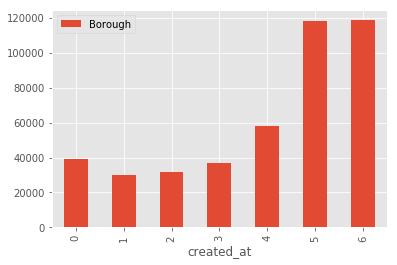

In [37]:
df[df['Descriptor'] == 'Loud Music/Party'].groupby(by=df[df['Descriptor'] == 'Loud Music/Party'].index.dayofweek).count().plot(kind = 'bar', y="Borough")

# Some more investigation

## Are there more homeless people in the city in the summer or in the winter?

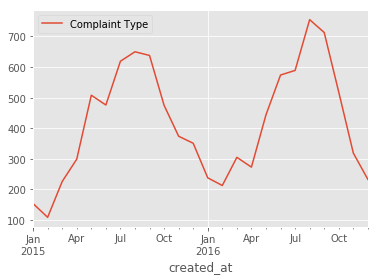

In [38]:
df[df['Complaint Type'] == 'Homeless Encampment'].sort_index().resample('M').count().plot(y='Complaint Type')

## What holiday(s) are most popular for illegal fireworks?

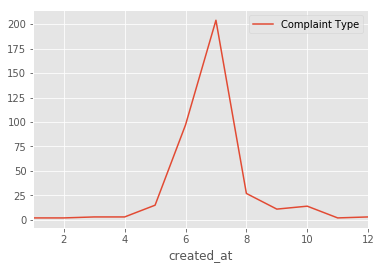

In [39]:
df[df['Complaint Type'] == 'Illegal Fireworks'].groupby(by=df[df['Complaint Type'] == 'Illegal Fireworks'].index.month).count().plot(y = 'Complaint Type')

## Plot all kinds of noise complaints on top of each other

In [40]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

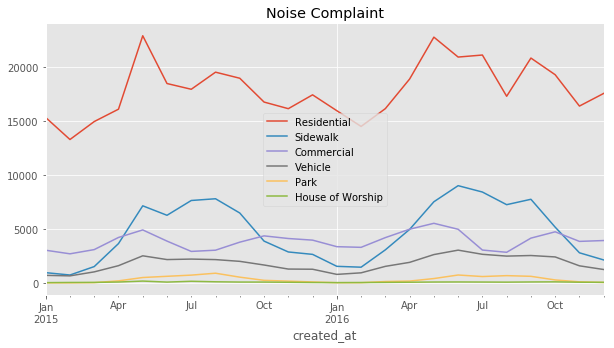

In [41]:
fig, ax = plt.subplots(figsize = (10, 5))

df[df['Complaint Type'] == "Noise - Residential"].sort_index().resample("M").count().plot(y= 'Complaint Type', label = "Residential", ax=ax)
df[df['Complaint Type'] == "Noise - Street/Sidewalk"].sort_index().resample("M").count().plot(y= 'Complaint Type', label = "Sidewalk", ax=ax)
df[df['Complaint Type'] == "Noise - Commercial"].sort_index().resample("M").count().plot(y= 'Complaint Type', label = "Commercial", ax=ax)
df[df['Complaint Type'] == "Noise - Vehicle"].sort_index().resample("M").count().plot(y= 'Complaint Type', label = "Vehicle", ax=ax)
df[df['Complaint Type'] == "Noise - Park"].sort_index().resample("M").count().plot(y= 'Complaint Type', label = "Park", ax=ax)
df[df['Complaint Type'] == "Noise - House of Worship"].sort_index().resample("M").count().plot(y= 'Complaint Type', label = "House of Worship", ax=ax)

ax.set_title("Noise Complaint")